<a href="https://colab.research.google.com/github/Manvi0509/Manvi0509.github.io/blob/main/AQI_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM


In [3]:
data_dir = '/content/DELHI_AQI_NEW.csv'
df = pd.read_csv(data_dir, parse_dates= True , index_col= "Timestamp")


In [4]:
df.head()


,AQI,Max temp,Min temp,precip,windspeed,winddir,PM2.5,PM10,NO2,SO2,Max 8-h CO,Max 8-h Ozone
Timestamp,,,,,,,,,,,,
01-01-2018,406,20.0,6.0,0.0,9.4,296.6,304.632353,440.251667,60.750588,17.06625,1.987692,34.130714
02-01-2018,418,17.4,8.0,0.0,9.4,287.8,280.470588,439.810833,53.138824,11.88500,1.708571,30.698571
03-01-2018,382,17.2,8.0,0.0,11.2,270.8,219.991765,344.039167,53.151765,10.18875,1.597143,31.054286
04-01-2018,366,20.2,5.0,0.0,13.0,120.0,245.572941,395.775833,60.116471,14.30250,1.477857,35.047143
05-01-2018,390,19.0,7.4,0.0,11.2,112.3,241.658235,365.410000,55.786471,13.58375,1.843846,28.534286


In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,AQI,Max temp,Min temp,precip,windspeed,winddir,PM2.5,PM10,NO2,SO2,Max 8-h CO,Max 8-h Ozone
Timestamp,,,,,,,,,,,,
01-01-2018,406,20.0,6.0,0.0,9.4,296.6,304.632353,440.251667,60.750588,17.06625,1.987692,34.130714
02-01-2018,418,17.4,8.0,0.0,9.4,287.8,280.470588,439.810833,53.138824,11.88500,1.708571,30.698571
03-01-2018,382,17.2,8.0,0.0,11.2,270.8,219.991765,344.039167,53.151765,10.18875,1.597143,31.054286
04-01-2018,366,20.2,5.0,0.0,13.0,120.0,245.572941,395.775833,60.116471,14.30250,1.477857,35.047143
05-01-2018,390,19.0,7.4,0.0,11.2,112.3,241.658235,365.410000,55.786471,13.58375,1.843846,28.534286


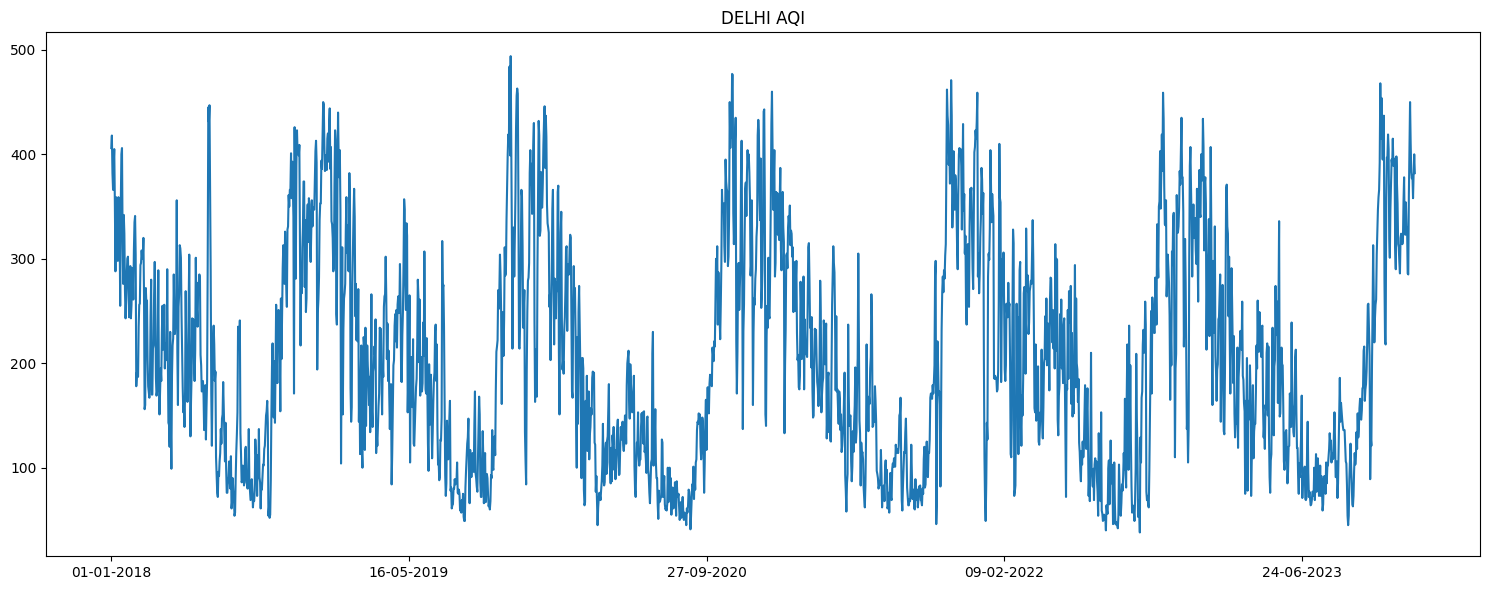

In [8]:
plt.figure(figsize=(15, 6))
df['AQI'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("DELHI AQI")
plt.tight_layout()
plt.show()


In [9]:
dataset = df["AQI"]
dataset = pd.DataFrame(dataset)


In [10]:
data = dataset.values


In [11]:
data.shape


(2191, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler


In [13]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))


In [14]:
# 75% to Train , 25% to Test
train_size = int(len(data)*.75)
test_size = len(data) - train_size


In [15]:
print("Train Size :",train_size,"Test Size :",test_size)


Train Size : 1643 Test Size : 548


In [16]:
train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]
train_data.shape, test_data.shape


((1643, 1), (608, 1))

In [17]:
# Creating a Training set with 60 time-steps and 1 output
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


In [19]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape , y_train.shape


((1583, 60, 1), (1583,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0539 - mean_absolute_error: 0.1669
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0190 - mean_absolute_error: 0.1079
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0190 - mean_absolute_error: 0.1062
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0182 - mean_absolute_error: 0.1055
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0167 - mean_absolute_error: 0.0980
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0166 - mean_absolute_error: 0.0971
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0139 - mean_absolute_error: 0.0905
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.0116 - mean_absolute_error: 0.0827
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0108 - mean_absolute_error: 0.0783
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0109 - mean_absolute_error: 0.0777
Epoch 11/100
50/50 ━━

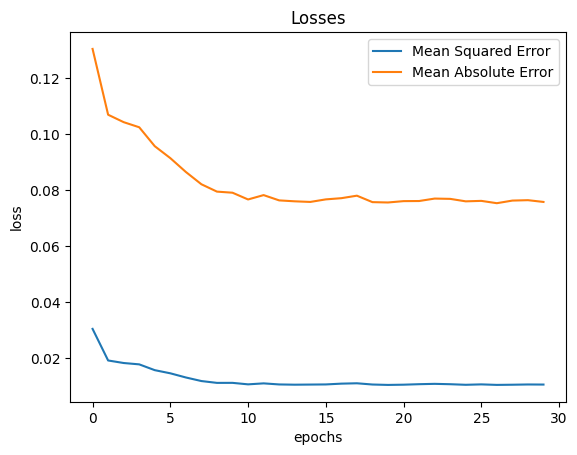

In [20]:
model = Sequential([
    LSTM(100, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(100, return_sequences= False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
model.summary()
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


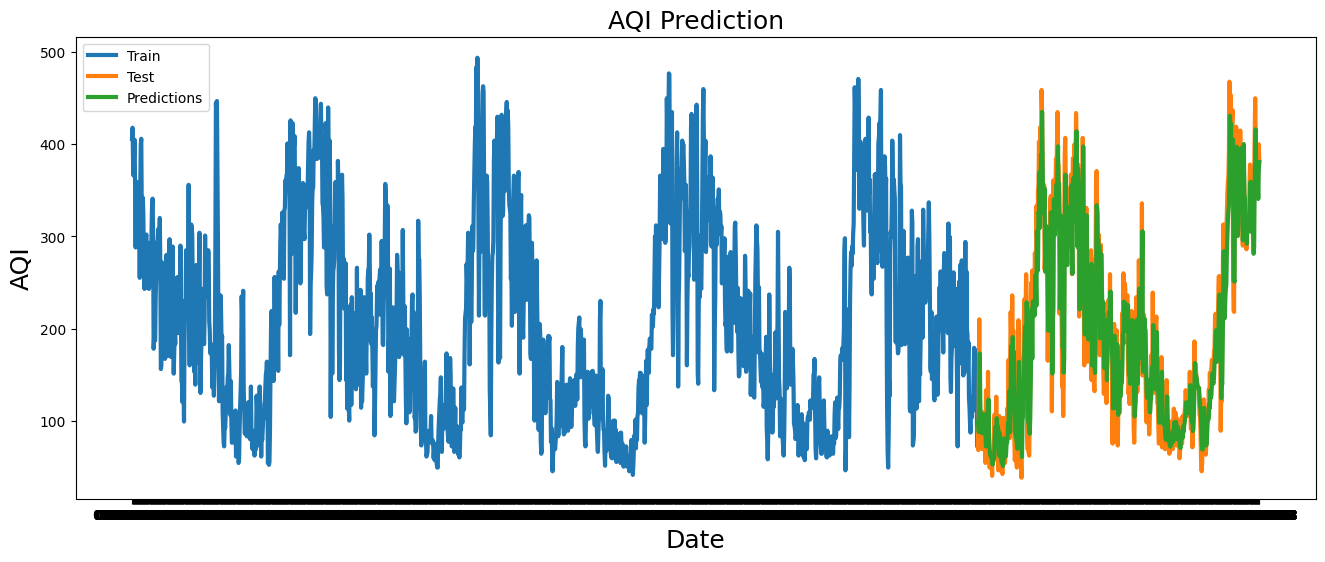

In [21]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape , y_test.shape
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

plt.figure(figsize= (16, 6))
plt.title('AQI Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('AQI', fontsize= 18)
plt.plot(train['AQI'], linewidth= 3)
plt.plot(test['AQI'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test','Predictions'])